In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
df=pd.read_csv("sonar_dataset.csv",header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
177,0.0201,0.0165,0.0344,0.0330,0.0397,0.0443,0.0684,0.0903,0.1739,0.2571,...,0.0054,0.0057,0.0137,0.0109,0.0035,0.0056,0.0105,0.0082,0.0036,M
42,0.0211,0.0319,0.0415,0.0286,0.0121,0.0438,0.1299,0.1390,0.0695,0.0568,...,0.0090,0.0042,0.0153,0.0106,0.0020,0.0105,0.0049,0.0070,0.0080,R
89,0.0235,0.0291,0.0749,0.0519,0.0227,0.0834,0.0677,0.2002,0.2876,0.3674,...,0.0083,0.0037,0.0095,0.0105,0.0030,0.0132,0.0068,0.0108,0.0090,R
94,0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,...,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,R
90,0.0126,0.0519,0.0621,0.0518,0.1072,0.2587,0.2304,0.2067,0.3416,0.4284,...,0.0208,0.0048,0.0199,0.0126,0.0022,0.0037,0.0034,0.0114,0.0077,R


In [6]:
df.shape

(208, 61)

In [7]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [8]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [9]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [10]:
X=df.drop(60,axis=1)
y=df[60]

In [12]:
y=pd.get_dummies(y,drop_first=True)
y.head()

,R
0,1
1,1
2,1
3,1
4,1


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5) 

In [14]:
import tensorflow as tf
from tensorflow import keras

In [16]:
model=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6090
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6859
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6859
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.7500
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.7308
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7949
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7692
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7949
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.8269
Epoch 11/

In [17]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.8654


[0.5093950033187866, 0.8653846383094788]

In [29]:
y_pred = np.round(model.predict(X_test)).reshape(-1)

In [27]:
y_test[:5]

,R
156,0
21,1
193,0
159,0
34,1


In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.84      0.80      0.82        20

    accuracy                           0.87        52
   macro avg       0.86      0.85      0.86        52
weighted avg       0.86      0.87      0.86        52



Text(50.722222222222214, 0.5, 'Truth')

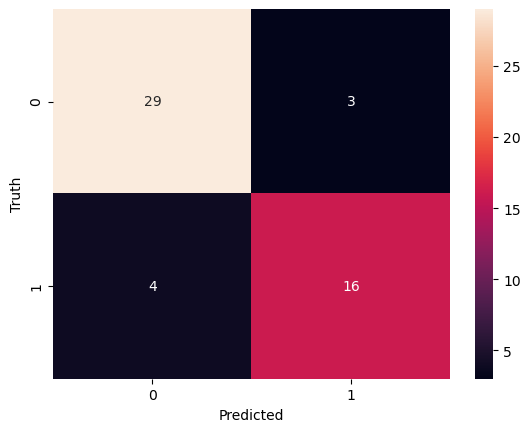

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
# Adding Dropout layer
modeld=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
modeld.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)
modeld.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7589 - accuracy: 0.4359
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5577
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.4744
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5321
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5064
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5449
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5769
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5321
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5705
Epoch 11/

In [35]:
modeld.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3440 - accuracy: 0.8269


[0.34399107098579407, 0.8269230723381042]